## Electric Vehicle Market Segmentation

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
ev_data = pd.read_csv('data.csv')
ev_data.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
# Last five record

ev_data.tail()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,No,AWD,Type 2 CCS,SUV,E,5,62000


In [4]:
# Size of the dataset

ev_data.shape

(103, 15)

In [5]:
# columns in the data

ev_data.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


In [7]:
# Null values in the data

ev_data.isnull().sum()

Unnamed: 0         0
Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [8]:
# check duplicate values

ev_data.duplicated().sum()

0

In [9]:
columns = ['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment',
               'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']

In [10]:
# unique values 
 
for col in columns:
    print(f"unique categories in column <<{col}>> , No. of Categories = {ev_data[col].nunique()}")
    print(ev_data[col].unique())
    print("-------------------------------------------------------------------------------")

unique categories in column <<Brand>> , No. of Categories = 33
['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']
-------------------------------------------------------------------------------
unique categories in column <<Model>> , No. of Categories = 102
['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe

In [11]:
# value counts
for col in columns:
    print(f"<<the {col} categories count is>>")
    print(ev_data[col].value_counts())
    print("------------------------------------------------------------------------------------")

<<the Brand categories count is>>
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64
------------------------------------------------------------------------------------
<<the Model categories count is>>
e-Soul 64 kWh                    2
Model 3 Long Range Dual Motor    1
Mustang Mach-E ER RWD            1
Sion                             1
M-Byte 95 kWh 4WD                1
                                ..
e-Niro 64 kWh    

In [12]:
df1 = ev_data.drop(['Brand','Model',],axis=1)
df1

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,99,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,100,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,101,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


### Data Visualisation

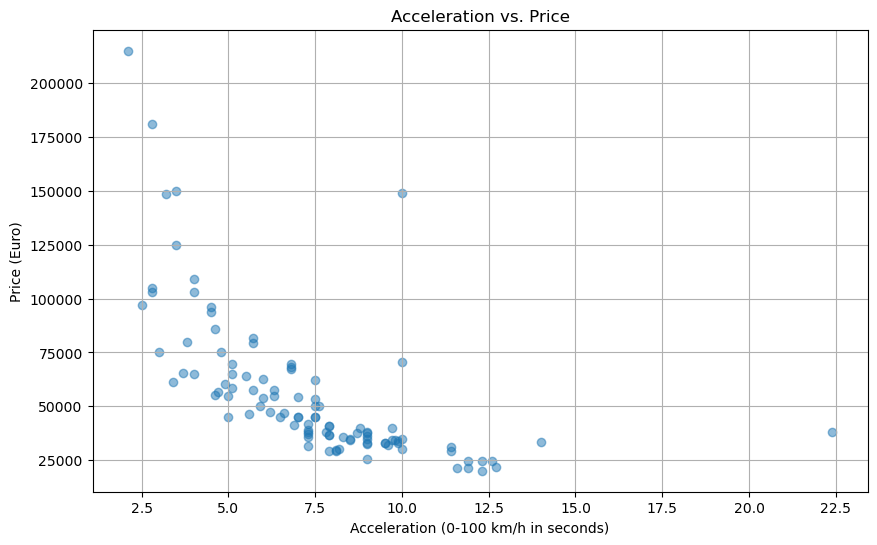

In [13]:
# Scatter plot of acceleration vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df1['AccelSec'], df1['PriceEuro'], alpha=0.5)
plt.title('Acceleration vs. Price')
plt.xlabel('Acceleration (0-100 km/h in seconds)')
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show()

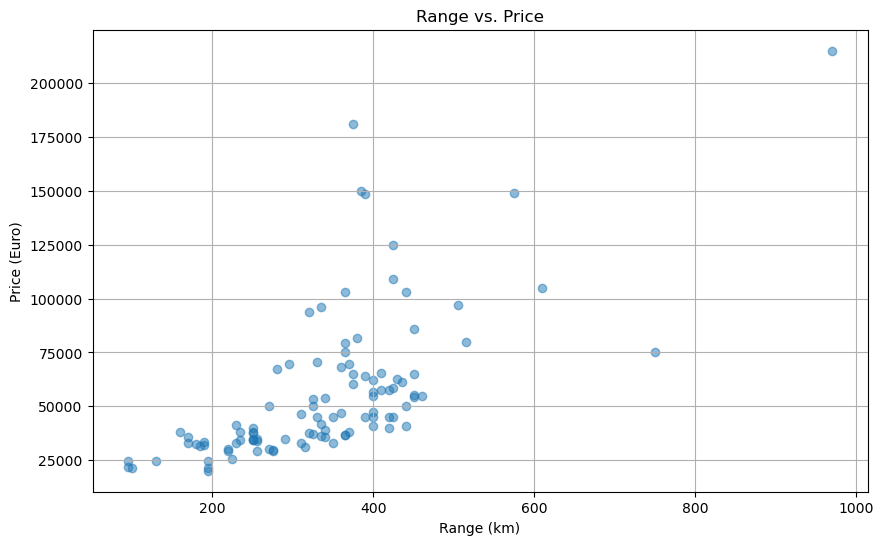

In [14]:
# Scatter plot of range vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df1['Range_Km'], df1['PriceEuro'], alpha=0.5)
plt.title('Range vs. Price')
plt.xlabel('Range (km)')
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show()

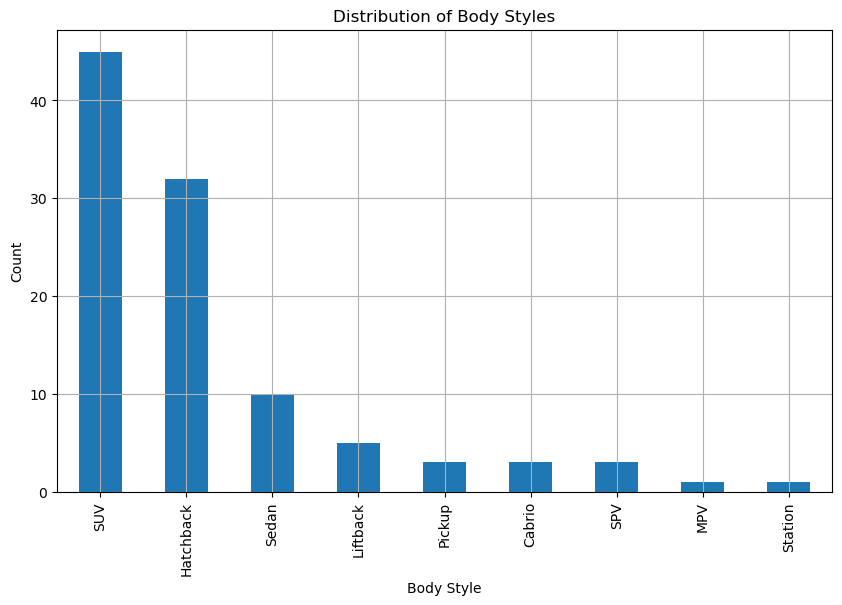

In [15]:
# Bar chart of body styles
plt.figure(figsize=(10, 6))
df1['BodyStyle'].value_counts().plot(kind='bar')
plt.title('Distribution of Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.grid(True)
plt.show()

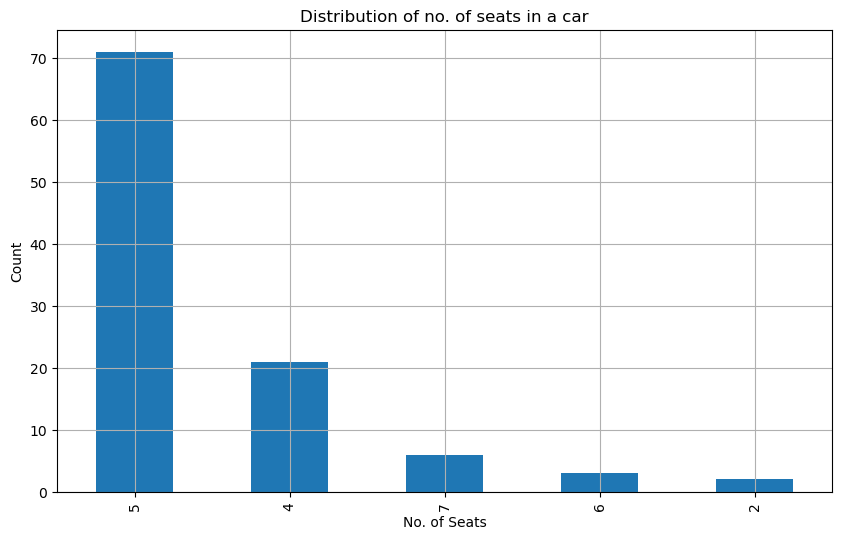

In [17]:
# Bar chart for no. of seats
plt.figure(figsize=(10, 6))
df1['Seats'].value_counts().plot(kind='bar')
plt.title('Distribution of no. of seats in a car')
plt.xlabel('No. of Seats')
plt.ylabel('Count')
plt.grid(True)
plt.show()

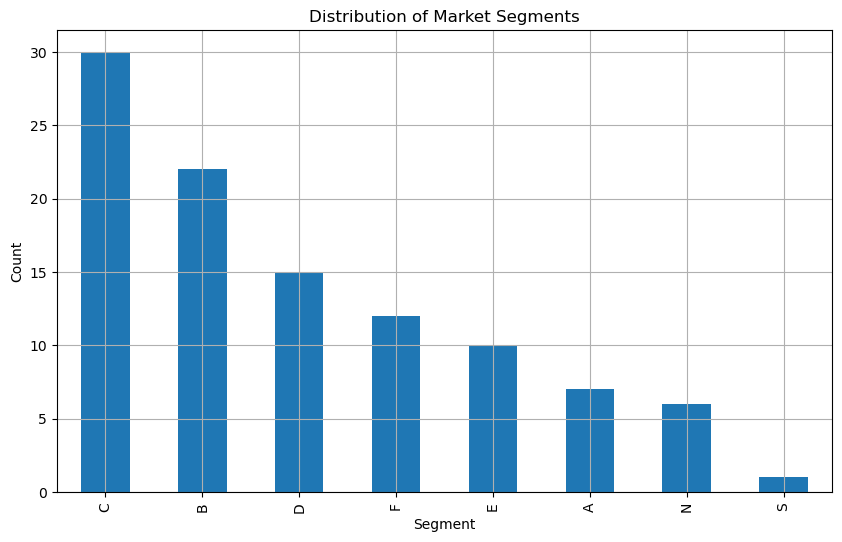

In [16]:
# Bar chart of segments
plt.figure(figsize=(10, 6))
df1['Segment'].value_counts().plot(kind='bar')
plt.title('Distribution of Market Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

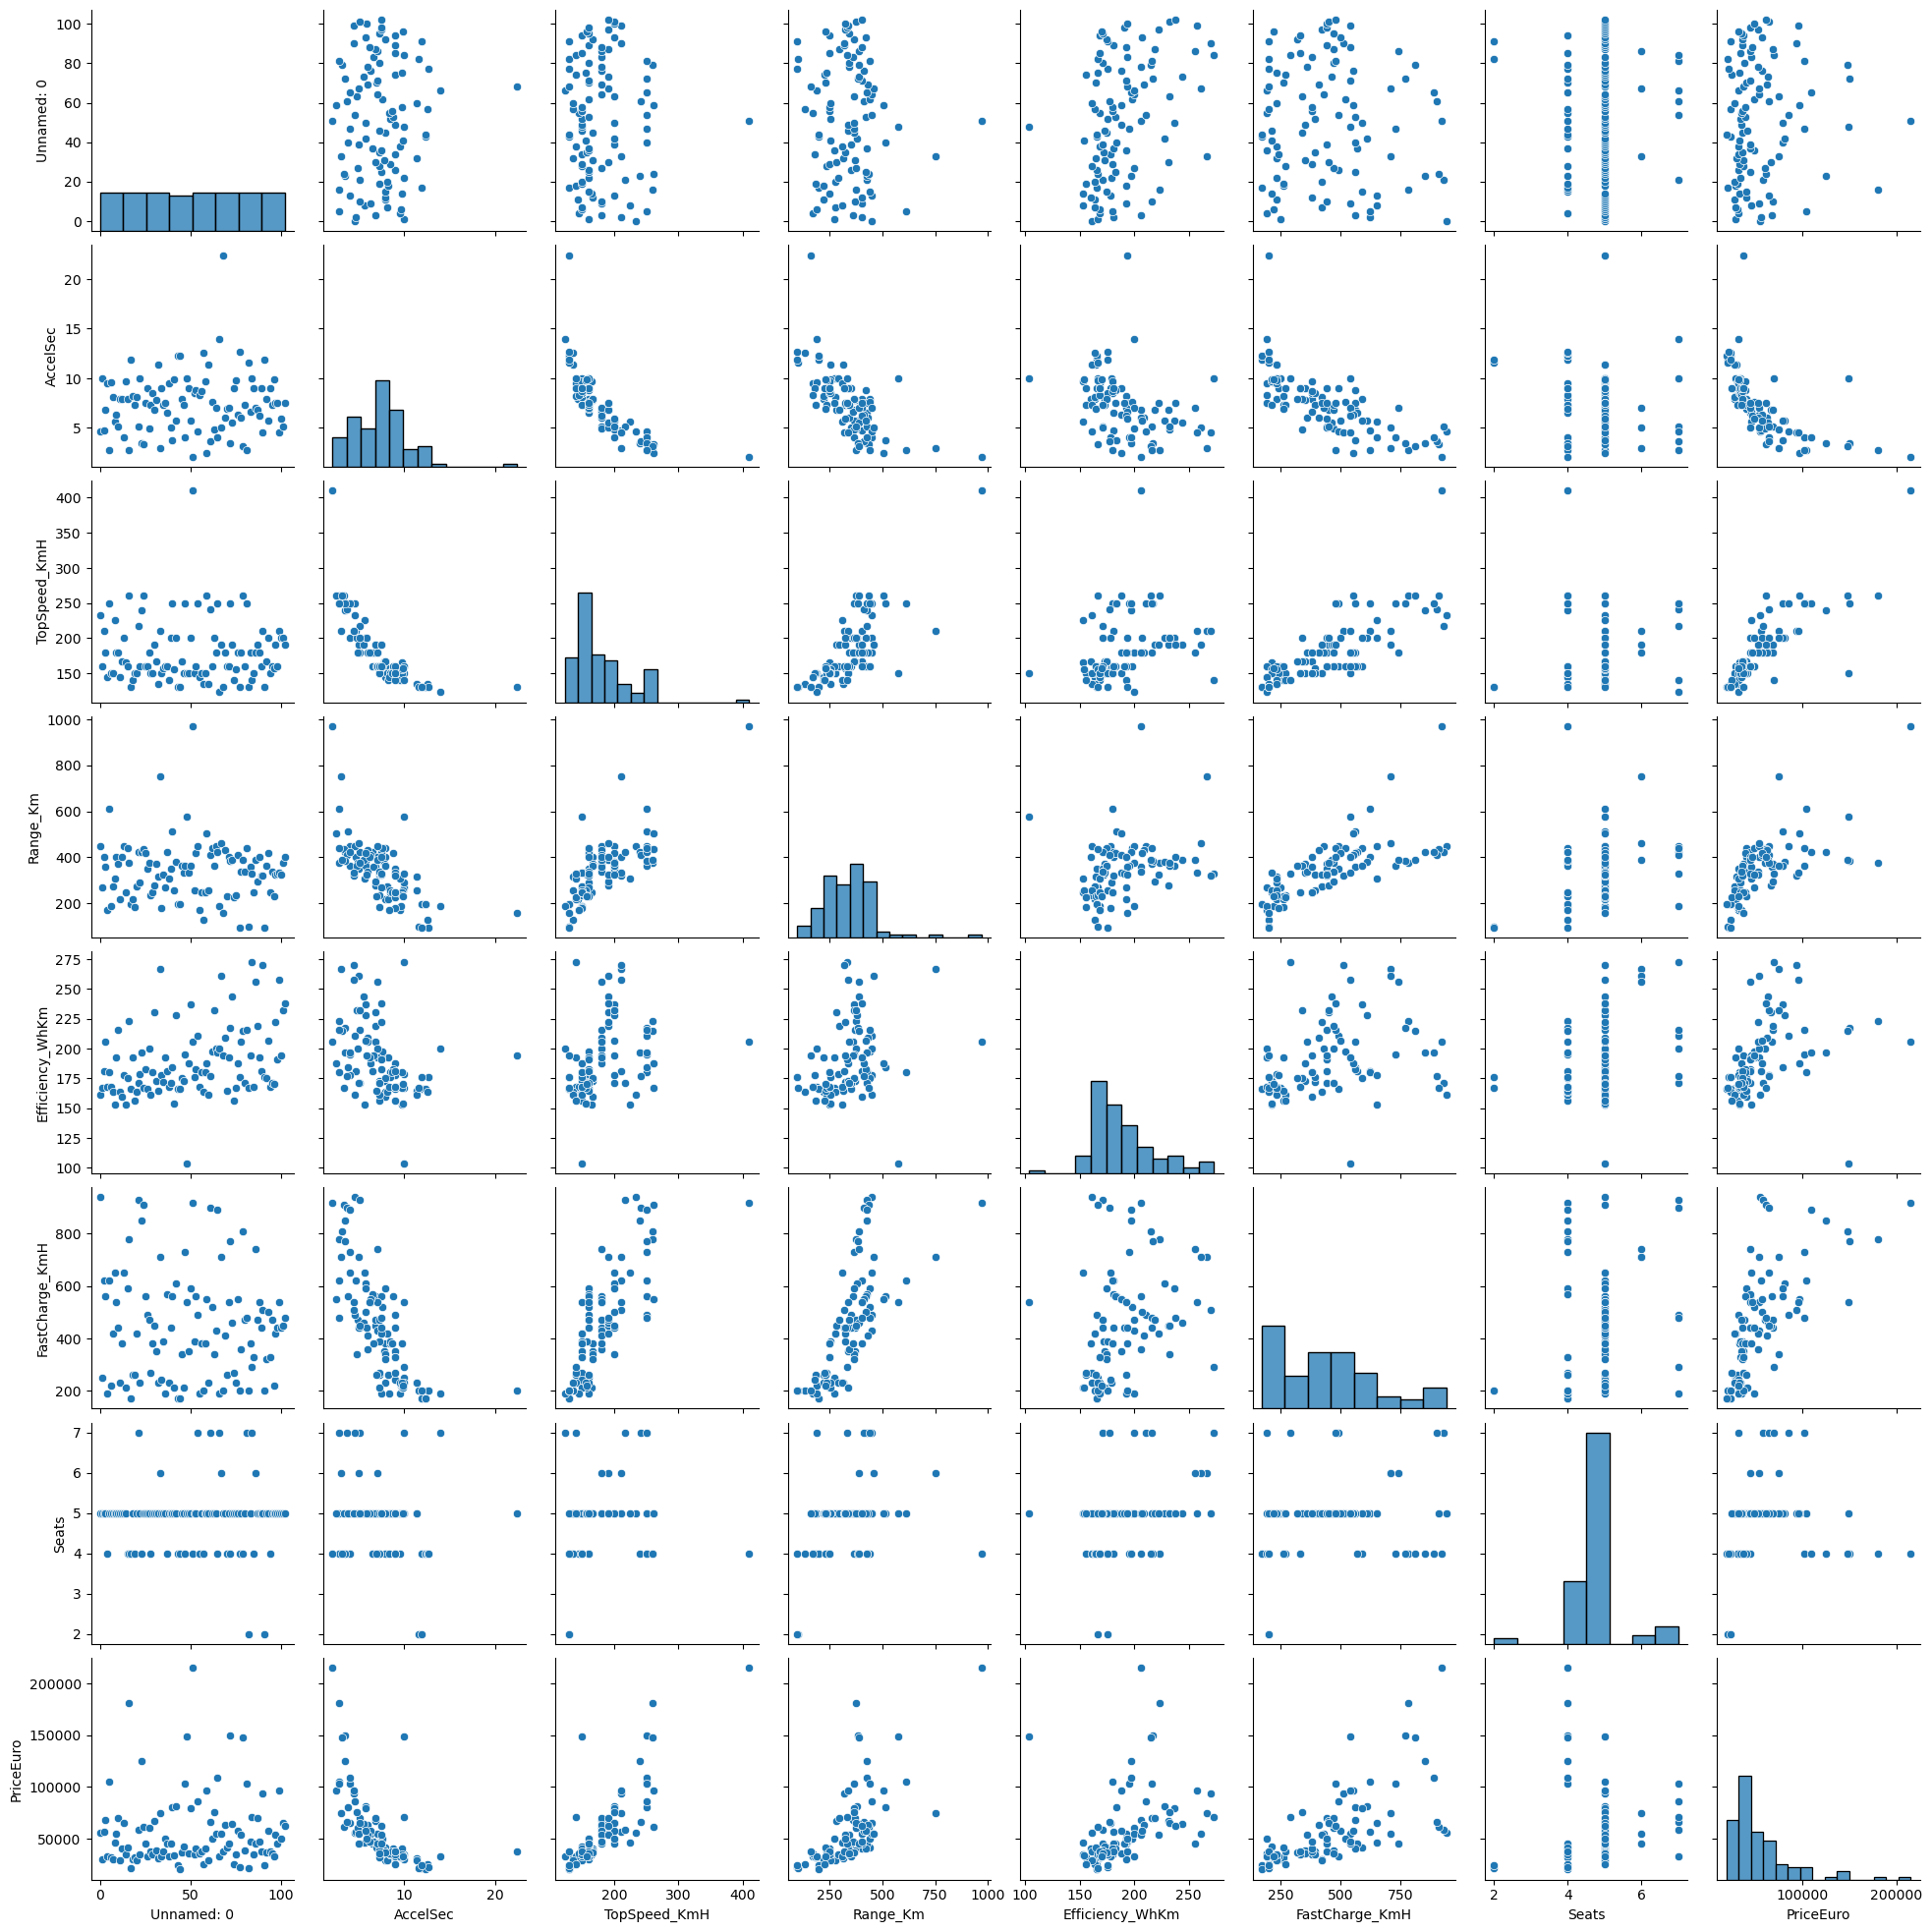

In [19]:
sns.pairplot(df1)
plt.show()

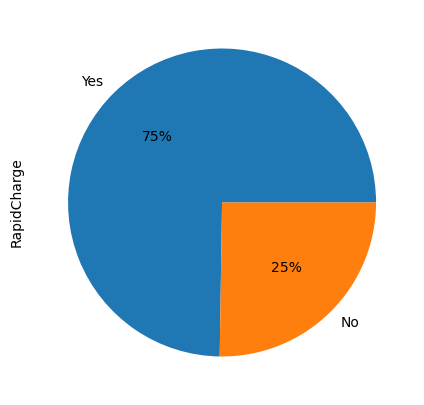

In [20]:
plt.figure(figsize=[5,5])
df1['RapidCharge'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

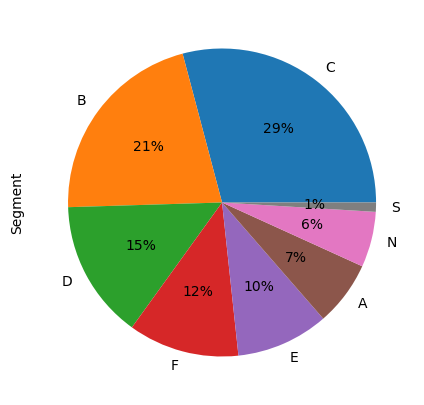

In [21]:
plt.figure(figsize=[5,5])
df1['Segment'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

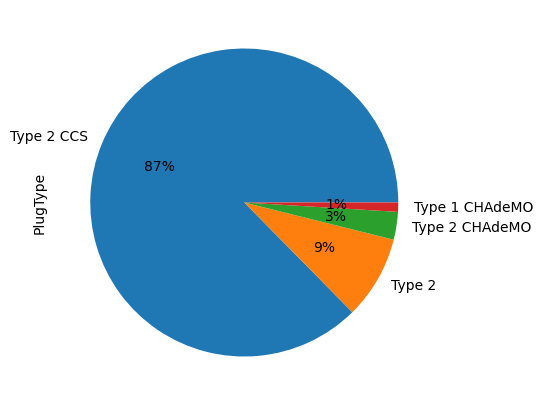

In [22]:
plt.figure(figsize=[5,5])
df1['PlugType'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

In [23]:
df1['TopSpeed'] = df1['TopSpeed_KmH'].astype(int)
df1['Range'] = df1['Range_Km'].astype(int)
df1['Efficiency'] = df1['Efficiency_WhKm'].astype(int)
df1['Accel'] = df1['AccelSec'].astype(float)

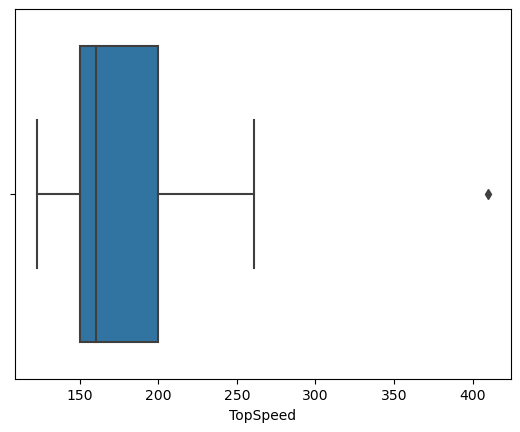

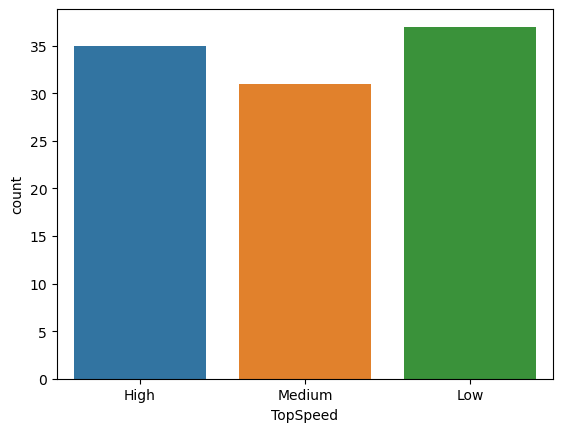

In [24]:
sns.boxplot(x = df1['TopSpeed'])
plt.show()
def convert(x):
     if x<160:
        return "Low"
     elif x>=160 and x<190:
        return "Medium"
     else:
        return "High"
converted_TopSpeed = df1['TopSpeed'].apply(convert)
sns.countplot(x = converted_TopSpeed)
plt.show()

In [25]:
df1['PlugType'].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [26]:
df1['RapidCharge'].value_counts()

Yes    77
No     26
Name: RapidCharge, dtype: int64

In [27]:
df1 = df1.drop(columns=['RapidCharge','PlugType'])

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
oe1=OrdinalEncoder(categories=[['AWD', 'RWD', 'FWD']])
oe2=OrdinalEncoder(categories=[['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio','SPV', 'Station']])
oe3=OrdinalEncoder(categories=[['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S']])

In [30]:
df1 = pd.get_dummies(df1)
df1

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,TopSpeed,Range,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,0,4.6,233,450,161,940,5,55480,233,450,...,1,0,0,0,0,1,0,0,0,0
1,1,10.0,160,270,167,250,5,30000,160,270,...,0,0,0,0,1,0,0,0,0,0
2,2,4.7,210,400,181,620,5,56440,210,400,...,0,0,0,0,0,1,0,0,0,0
3,3,6.8,180,360,206,560,5,68040,180,360,...,0,0,0,0,0,1,0,0,0,0
4,4,9.5,145,170,168,190,4,32997,145,170,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,7.5,160,330,191,440,5,45000,160,330,...,0,0,0,0,1,0,0,0,0,0
99,99,4.5,210,335,258,540,5,96050,210,335,...,0,0,0,0,0,0,1,0,0,0
100,100,5.9,200,325,194,440,5,50000,200,325,...,0,0,0,0,1,0,0,0,0,0
101,101,5.1,200,375,232,450,5,65000,200,375,...,0,0,0,0,1,0,0,0,0,0


In [31]:
df1=df1.astype(float)

In [32]:
cols_to_norm = ['Accel','TopSpeed','Range','Efficiency','FastCharge_KmH','PriceEuro']
df_prev=df1.copy()
df1[cols_to_norm] = df1[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [33]:
df1

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,TopSpeed,Range,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,0.0,4.6,233.0,450.0,161.0,1.000000,5.0,0.181407,0.383275,0.405714,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,10.0,160.0,270.0,167.0,0.103896,5.0,0.050654,0.128920,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,4.7,210.0,400.0,181.0,0.584416,5.0,0.186334,0.303136,0.348571,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,6.8,180.0,360.0,206.0,0.506494,5.0,0.245860,0.198606,0.302857,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,9.5,145.0,170.0,168.0,0.025974,4.0,0.066033,0.076655,0.085714,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98.0,7.5,160.0,330.0,191.0,0.350649,5.0,0.127628,0.128920,0.268571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99,99.0,4.5,210.0,335.0,258.0,0.480519,5.0,0.389596,0.303136,0.274286,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100,100.0,5.9,200.0,325.0,194.0,0.350649,5.0,0.153286,0.268293,0.262857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,101.0,5.1,200.0,375.0,232.0,0.363636,5.0,0.230260,0.268293,0.320000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.cluster import KMeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'evs')

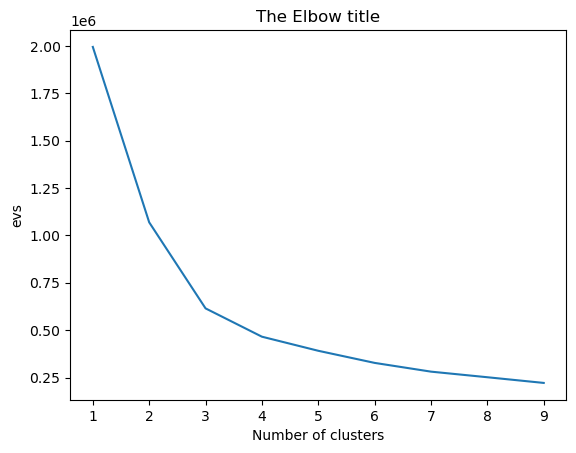

In [35]:
evs=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df1)
    evs_iter = kmeans.inertia_
    evs.append(evs_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,evs)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('evs')

In [36]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [37]:
identified_clusters = kmeanModel.fit_predict(df1)
identified_clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 1, 4, 0, 1, 3, 1, 1, 0, 4, 0, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 4,
       0, 4, 4, 4, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 4, 0, 0, 4, 1, 0, 1,
       1, 0, 0, 4, 3, 0, 0, 2, 1, 4, 4, 1, 1, 1, 1, 4, 1, 4, 4, 0, 4, 4,
       1, 4, 1, 4, 1, 0, 4, 0, 1, 1, 4, 1, 0, 4, 0, 4, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [38]:
data_with_clusters = df_prev.copy()
data_with_clusters['Clusters'] = identified_clusters 
data_with_clusters

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,TopSpeed,Range,...,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,Clusters
0,0.0,4.6,233.0,450.0,161.0,940.0,5.0,55480.0,233.0,450.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,1.0,10.0,160.0,270.0,167.0,250.0,5.0,30000.0,160.0,270.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,2.0,4.7,210.0,400.0,181.0,620.0,5.0,56440.0,210.0,400.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,3.0,6.8,180.0,360.0,206.0,560.0,5.0,68040.0,180.0,360.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,4.0,9.5,145.0,170.0,168.0,190.0,4.0,32997.0,145.0,170.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98.0,7.5,160.0,330.0,191.0,440.0,5.0,45000.0,160.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
99,99.0,4.5,210.0,335.0,258.0,540.0,5.0,96050.0,210.0,335.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
100,100.0,5.9,200.0,325.0,194.0,440.0,5.0,50000.0,200.0,325.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
101,101.0,5.1,200.0,375.0,232.0,450.0,5.0,65000.0,200.0,375.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [39]:
data_with_clusters['Clusters'].value_counts()

0    37
1    34
4    28
3     3
2     1
Name: Clusters, dtype: int64